Seaborn 

In [ ]:
#seaborn has more customization options for plots on matplotlib

In [1]:
#Importing Libraries 

import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

#Loading Data 

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup 

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)



In [2]:
#Installing and importing seaborn
#Step 1: install seaborn into the environment in the terminal 

#Step 2: Import seaborn 
import seaborn as sns 

In [7]:
#creating a dataframe with only data analyst jobs in the US
df_da_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

#drop NaN values from 'salary_year_avg' column 
df_da_us = df_da_us.dropna(subset=['salary_year_avg'])

In [9]:
df_da_us.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17440 entries, 109 to 784882
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   job_title_short        17440 non-null  object        
 1   job_title              17440 non-null  object        
 2   job_location           17212 non-null  object        
 3   job_via                17440 non-null  object        
 4   job_schedule_type      17404 non-null  object        
 5   job_work_from_home     17440 non-null  bool          
 6   search_location        17440 non-null  object        
 7   job_posted_date        17440 non-null  datetime64[ns]
 8   job_no_degree_mention  17440 non-null  bool          
 9   job_health_insurance   17440 non-null  bool          
 10  job_country            17440 non-null  object        
 11  salary_rate            17440 non-null  object        
 12  salary_year_avg        17440 non-null  float64       
 13  sal

In [22]:
#Creating the bar charts from the last excercise 

#explode job skills into individual rows
df_da_us = df_da_us.explode('job_skills')

#new df grouped by job_skills and  return the count and median of salary
df_da_top_pay = df_da_us.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median', ascending=False)
df_da_top_pay = df_da_top_pay.head(10)

#new df of top 10 in demand skills 
df_da_skills = df_da_us.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count', ascending=False)
df_da_skills = df_da_skills.head(10).sort_values(by='median', ascending=False)



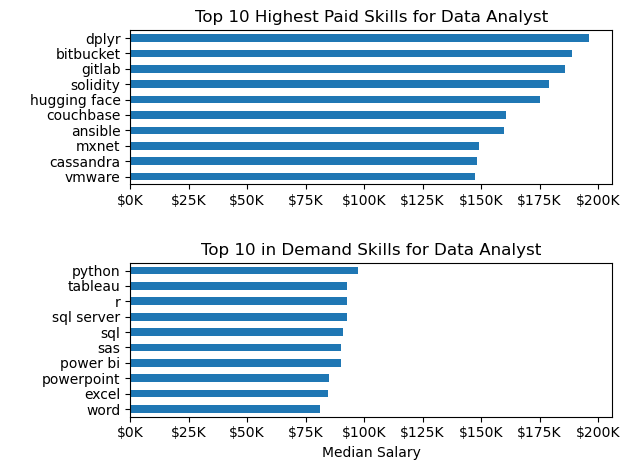

In [ ]:
#Creating a subplot
fig, ax =plt.subplots(2,1)

#plotting eachc data frame I created into the subplots 
df_da_top_pay[::-1].plot(kind='barh', y ='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_ylabel(' ')
ax[0].set_xlabel(' ')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

df_da_skills[::-1].plot(kind='barh', y ='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 in Demand Skills for Data Analyst')
ax[1].set_ylabel(' ')
ax[1].set_xlabel('Median Salary')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


#changing the xlim for both figures by set_xlim on the bottom plot to match the current xlim of top plot
ax[1].set_xlim(ax[0].get_xlim())

fig.tight_layout()

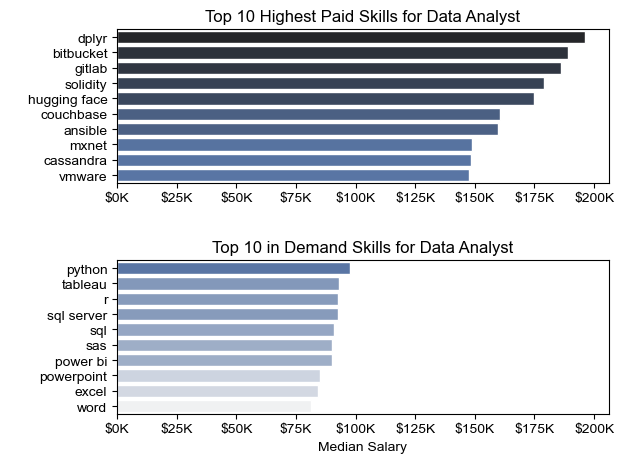

In [35]:
#This block of code will be used to do the same chart and adjust with seaborn

#Creating a subplot
fig, ax =plt.subplots(2,1)


sns.set_theme(style='ticks')

#df_da_top_pay[::-1].plot(kind='barh', y ='median', ax=ax[0], legend=False)

sns.barplot(data=df_da_top_pay, x='median', y=df_da_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r', legend=False)

ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_ylabel(' ')
ax[0].set_xlabel(' ')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

#df_da_skills[::-1].plot(kind='barh', y ='median', ax=ax[1], legend=False)

sns.barplot(data=df_da_skills, x='median', y=df_da_skills.index, ax=ax[1], hue='median', palette='light:b', legend=False)

ax[1].set_title('Top 10 in Demand Skills for Data Analyst')
ax[1].set_ylabel(' ')
ax[1].set_xlabel('Median Salary')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


#changing the xlim for both figures by set_xlim on the bottom plot to match the current xlim of top plot
ax[1].set_xlim(ax[0].get_xlim())

fig.tight_layout()

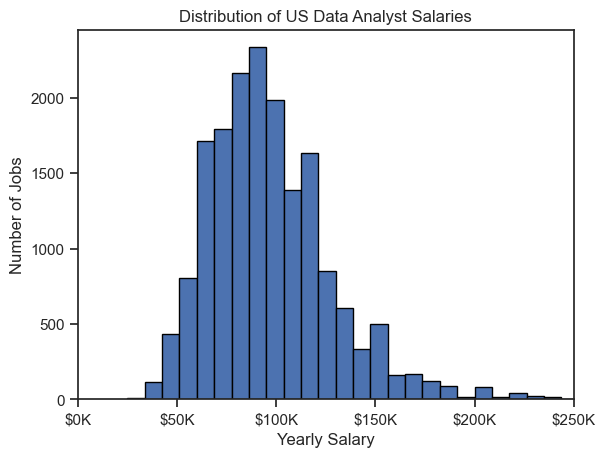

In [ ]:
#Old histogram I made 

df_da_us['salary_year_avg'].plot(kind='hist',bins = 40, edgecolor='black')

#adjusting the x limit to remove outliers in data
plt.xlim(0,250000)

#adjusting and formattimg the values in x axis 
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.title('Distribution of US Data Analyst Salaries')
plt.ylabel('Number of Jobs')
plt.xlabel('Yearly Salary')

plt.show()

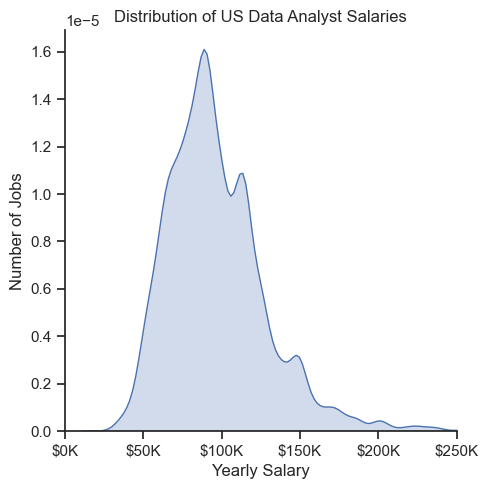

In [40]:
#using seaborn to make a more appealing histograms

sns.displot(df_da_us['salary_year_avg'], kind ='kde', fill=True)

#df_da_us['salary_year_avg'].plot(kind='hist',bins = 40, edgecolor='black')

#adjusting the x limit to remove outliers in data
plt.xlim(0,250000)

#adjusting and formattimg the values in x axis 
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.title('Distribution of US Data Analyst Salaries')
plt.ylabel('Number of Jobs')
plt.xlabel('Yearly Salary')

plt.show()

C:\Users\mitta\AppData\Local\Temp\ipykernel_21884\383439593.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


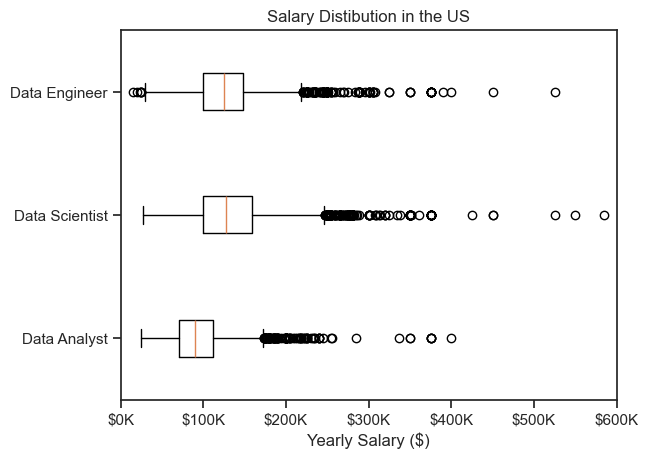

In [ ]:
#previous box plot example

job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

df_us = df[df['job_title_short'].isin(job_titles)].copy()

df_us= df_us.dropna(subset=['salary_year_avg'])

#using list comprehension to create a series called job_list 
job_list = [df_us[df_us['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

#plotting job_list 
plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distibution in the US')
plt.xlabel('Yearly Salary ($)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0,600000)
plt.show()

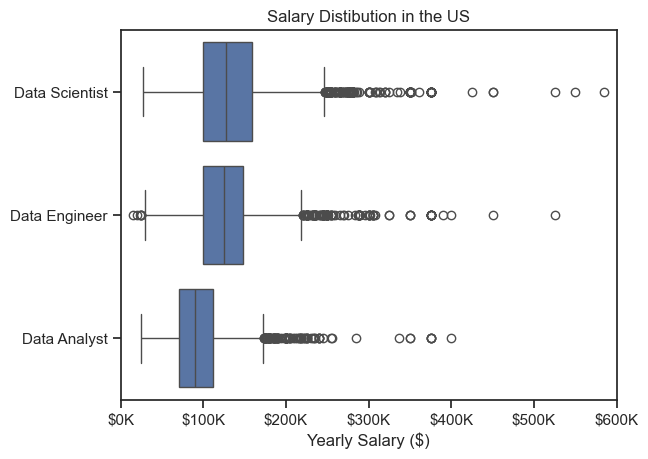

In [43]:
sns.boxplot(data=df_us, x='salary_year_avg', y='job_title_short')

plt.title('Salary Distibution in the US')
plt.xlabel('Yearly Salary ($)')
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0,600000)
plt.show()